In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
from pathlib import Path
sys.path.append("../iclr_17_compression/")
import torch
from test_model import plot_tensor
import random as rd

In [2]:
path_to_covers = Path("../JIN_SRNet/BossBase-1.01-cover/")
path_to_stego = Path("../JIN_SRNet/stego_1_5bit//")

cover_files = list(path_to_covers.glob("*.pt"))
stego_files = list(path_to_stego.glob("*.pt")) #we use glob because there is a txt file in stego folder

torch.Size([1, 3, 512, 512])
tensor([[[[0.3326, 0.3262, 0.3259,  ..., 0.3574, 0.3598, 0.3587],
          [0.3280, 0.3258, 0.3255,  ..., 0.3565, 0.3581, 0.3579],
          [0.3272, 0.3261, 0.3250,  ..., 0.3559, 0.3584, 0.3583],
          ...,
          [0.0544, 0.0505, 0.0557,  ..., 0.0504, 0.0422, 0.0429],
          [0.0559, 0.0476, 0.0511,  ..., 0.0453, 0.0374, 0.0473],
          [0.0629, 0.0498, 0.0508,  ..., 0.0383, 0.0432, 0.0616]],

         [[0.3257, 0.3246, 0.3260,  ..., 0.3566, 0.3580, 0.3561],
          [0.3254, 0.3283, 0.3290,  ..., 0.3596, 0.3599, 0.3595],
          [0.3262, 0.3297, 0.3289,  ..., 0.3587, 0.3598, 0.3597],
          ...,
          [0.0448, 0.0485, 0.0524,  ..., 0.0545, 0.0449, 0.0411],
          [0.0460, 0.0445, 0.0470,  ..., 0.0493, 0.0376, 0.0417],
          [0.0470, 0.0407, 0.0413,  ..., 0.0391, 0.0407, 0.0553]],

         [[0.3281, 0.3241, 0.3258,  ..., 0.3564, 0.3578, 0.3561],
          [0.3276, 0.3270, 0.3273,  ..., 0.3610, 0.3614, 0.3614],
          [0.

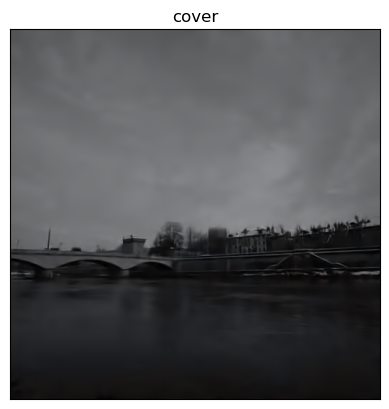

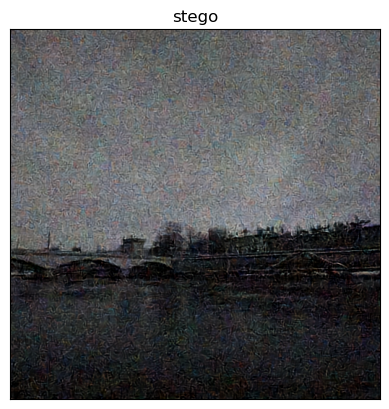

In [3]:
id_random = rd.randint(0,len(cover_files))
cover_file = list(path_to_covers.glob(f"*{id_random}*.pt"))[0]
stego_file = list(path_to_stego.glob(f"*{id_random}*.pt"))[0]

cover_t = torch.load(cover_file)
stego_t = torch.load(stego_file) 
print(cover_t.shape)
print(cover_t)
plot_tensor(cover_t,"cover")
plot_tensor(stego_t,"stego")